In [24]:
from urllib import request
import numpy as np
import copy
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

T = 8  # shot duration
M = 3  # 內容種類數量
alpha = 0.8  # 冪律參數
u_mean = 2 # 平均熱度 lambda

zm = np.random.rand(M)  # zm用來計算um，數組長度為內容種類數量，從[0,1]中取值
all_m_pop = zm**(-alpha)*u_mean*(1-alpha) # 內容m的平均熱度

print(f'1:{zm}')
print(f'2:{all_m_pop}')

requestnum = all_m_pop * T #內容m 個別總共的請求數量
wn = [] #單個內容請求到達的時間
m_start_wn = {} #每個內容的請求到達的時間
wn.append(0)
T_interval = []
for onem in range(0, M):
    T_interval = np.random.exponential(1/all_m_pop[onem],int(requestnum[onem]))
    for onetime in range(1,len(T_interval)+1):
        wn.append(onem*5+wn[onetime -1]+ T_interval[onetime - 1])
    m_start_wn[onem] = copy.copy(wn)
    wn = []
    wn.append(0)


totallist = [] #將所有內容的請求時間序列放在一起
for onekey in m_start_wn.keys():
    totallist += m_start_wn[onekey][1:]
totallist.sort() #將其按從小到達排序

num = 0
requestseq = [-1]*len(totallist)#最後生成的請求序列
for onem in range(0, M): #對每個內容做遍歷，依據其請求到達的時間節點決定請求序列中的位置
    num += 1
    wn = m_start_wn[onem]
    for onet in wn[1:]:
        requestseq[totallist.index(onet)] = onem

print(f'{len(requestseq)}, {requestseq}')

1:[0.36321663 0.51545192 0.31874821]
2:[0.89934725 0.67968778 0.99839359]
19, [0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2]


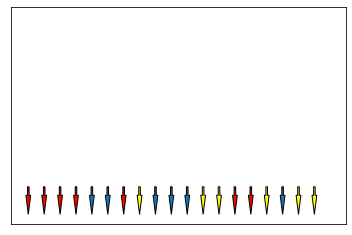

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline



# y=[0.21767476, 1.2919996,  4.14791927, 0.78838882, 0.21281268 , 0.80031576]
# x=np.arange(0, len(y), 1)

# l_ =[0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2]
l_ = [2, 2, 2, 2, 3, 3, 2, 1, 3, 3, 3, 1, 1, 2, 2, 1, 3, 1, 1]




# spl = make_interp_spline(x, y)  # type: BSpline
# x_ = np.linspace(x.min(), x.max(), 500)
# y_ = spl(x_)

plt.plot(19,5)
# plt.plot(x_, y_)
# plt.figure(figsize=(20,5), facecolor=(1,1,1,1))
for i in range(len(l_)):
    if l_[i] == 3:
        plt.arrow(i,1,0,-0.2,width=0.1,head_width=0.3) ## blue
    elif l_[i] == 1:
        plt.arrow(i,1,0,-0.2,width=0.1,head_width=0.3, facecolor = "yellow")
    else:
        plt.arrow(i,1,0,-0.2,width=0.1,head_width=0.3, facecolor = "red")
ax = plt.gca()

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# plt.arrow(0,1,0,-1,width=0.1,head_width=0.3)
# plt.arrow(1,1,0,-1, width=0.1,head_width=0.3, facecolor="red" )
# plt.savefig("./fig/zipf_t"+".png", facecolor= (1,1,1,1))


plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


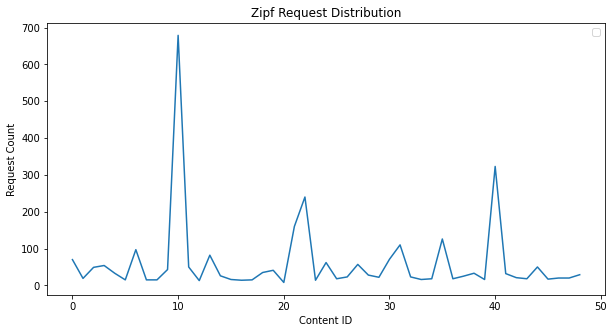

In [10]:

import matplotlib.pyplot as plt
import numpy as np

file_name = 'zipf_50_9000_cps.txt'
f = open("./dataset/req_trace/"+file_name, "r")
test_data = eval(f.read())
f.close()
save_path = "zip1-3"
# print(test_data[:999])
# [:999] [1000:1999] [2000:2999]
test_data_seg = test_data[3000:5999]
set_data = set(test_data_seg)
set_data_ct =[]
# print(set_data)

for i in range(1, 50):
    if i in set_data:
        set_data_ct.append(test_data_seg.count(i))
    else:
        set_data_ct.append(0)
# print(set_data_ct)

plt.figure(figsize=(10,5), facecolor=(1,1,1,1))
plt.plot(np.arange(len(set_data_ct)), set_data_ct, label="", alpha = 1, color='C0')
plt.ylabel("Request Count")
plt.xlabel("Content ID")
plt.title("Zipf Request Distribution")
plt.legend()


# plt.savefig("./fig/"+save_path+".png", facecolor= (1,1,1,1))

# plt.show()


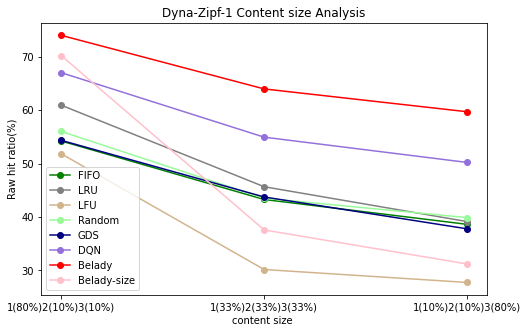

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

save_path = "z1kind"

s = ["1(80%)2(10%)3(10%)", "1(33%)2(33%)3(33%)", "1(10%)2(10%)3(80%)"]


fifo = [54.22, 43.27, 38.62] # [39.68, 31.15, 28.51] [54.22, 43.27, 38.62] [41.55, 30.63, 24.25]
lru = [60.92, 45.66, 39.14] # [43.17, 33.05, 28.36] [60.92, 45.66, 39.14] [46.30, 33.42, 24.36]
lfu =  [51.83, 30.16, 27.74] # [40.58, 34.78, 28.85] [51.83, 30.16, 27.74] [45.53, 31.45, 18.06]
random =  [56.01, 43.51, 39.88] #[45.34, 36.24, 31.09] [56.01, 43.51, 39.88] [44.44, 31.84, 24.35]
gds = [54.34, 43.74, 37.78] # [44.01, 33.54, 29.59] [54.34, 43.74, 37.78] [42.11, 29.47, 24.01]
dqn = [67.01, 54.94, 50.21] # [58.24, 47.17, 44.00] [67.01, 54.94, 50.21] [53.98, 40.52, 31.35]
belady = [74.00, 63.97, 59.70] # [65.20, 54.88, 48.56] [74.00, 63.97, 59.70] [65.68, 52.17, 44.56]
belady_s = [70.20, 37.57, 31.20] # [62.80, 36.88, 36.79] [70.20, 37.57, 31.20] [65.00, 32.42, 20.37]

plt.figure(figsize=(8,5), facecolor=(1,1,1,1))
plt.title('Dyna-Zipf-1 Content size Analysis')
plt.plot(s, fifo, color='green', label='FIFO', marker= 'o')
plt.plot(s, lru, color='gray', label='LRU', marker= 'o')
plt.plot(s, lfu, color='tan', label='LFU', marker= 'o')
plt.plot(s, random, color='palegreen', label='Random', marker= 'o')
plt.plot(s, gds, color='navy', label='GDS', marker= 'o')
plt.plot(s, dqn, color='mediumpurple', label='DQN', marker= 'o')
plt.plot(s, belady, color='red', label='Belady', marker= 'o')
plt.plot(s, belady_s, color='pink', label='Belady-size', marker= 'o')


plt.legend()

plt.xlabel('content size ')
plt.ylabel('Raw hit ratio(%)')
plt.savefig("./fig/"+save_path+".png", facecolor= (1,1,1,1))

plt.show()



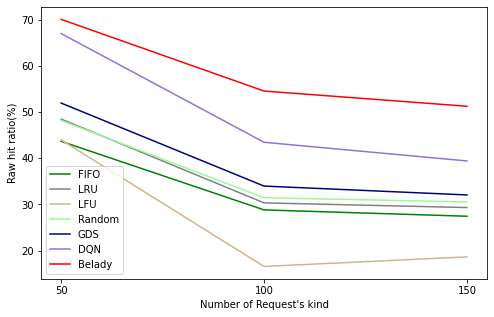

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

save_path = "vskind"

s = ["50", "100", "150"]


fifo = [43.67, 28.82, 27.45] 
lru =  [48.49, 30.34, 29.33] 
lfu =  [43.98, 16.58, 18.65] 
random = [48.18, 31.46, 30.54]
gds = [51.95, 33.98, 32.06] 
dqn =  [67.00, 43.46, 39.42] 
belady = [70.07, 54.55, 51.26]
# belady_s = [65.00, 32.42, 20.37]

plt.figure(figsize=(8,5), facecolor=(1,1,1,1))
plt.title('')
plt.plot(s, fifo, color='green', label='FIFO')
plt.plot(s, lru, color='gray', label='LRU')
plt.plot(s, lfu, color='tan', label='LFU')
plt.plot(s, random, color='palegreen', label='Random')
plt.plot(s, gds, color='navy', label='GDS')
plt.plot(s, dqn, color='mediumpurple', label='DQN')
plt.plot(s, belady, color='red', label='Belady')


plt.legend()

plt.xlabel('Number of Request\'s kind')
plt.ylabel('Raw hit ratio(%)')
plt.savefig("./fig/"+save_path+".png", facecolor= (1,1,1,1))

plt.show()



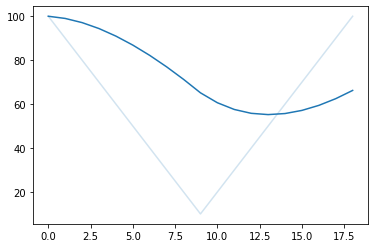

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# a = [10,100,10,100,10,100]
a = [100,90,80,70,60,50,40,30,20,10,20,30,40,50,60,70,80,90,100]


def get_smooth(l, s_v=0.9):
    s_l = []
    for i in range(len(l)):
                          # 0.1                  0.9
        # s_l.append(l[i] * (1 - s_v) + s_l[i-1] * s_v if i > 0 else l[i])

        s_l.append(l[i] * 0.1 + s_l[i-1] * 0.9 if i > 0 else l[i])
    return s_l


plt.plot(np.arange(len(a)), a, label="state_with_topo", alpha = 0.2, color='C0')
plt.plot(np.arange(len(a)), get_smooth(a, 0.95), label="state_with_topo_smooth", color='C0')
# print(get_smooth(a))

In [3]:
dic = {1: 0, 2: 0, 3: 0}
dic[4] = [5, 6]
for i, j in dic.items():
    print(i,j)

1 0
2 0
3 0
4 [5, 6]


In [18]:
def last_index(a, va):
    return [j for (i,j) in enumerate(a) if i == va]

a =[1,2,3,4,1,2]
ab = 5
try:
    last_pos = len(a) - a[::-1].index(ab)-1
    
except:
    last_pos = 0

print(last_pos)

0


In [1]:
f = [0] * 2
print(f)

[0, 0]
